In [7]:
from html.parser import HTMLParser
import requests
from requests.auth import HTTPBasicAuth


In [8]:
class MyHTMLParser(HTMLParser):
    def __init__(self):
      super().__init__()
      self.json_files = []

    def handle_starttag(self, tag, attrs):
        try:
          if attrs[0][0]=='href' and (attrs[0][1]).split('.')[-1]=='json':
            url=attrs[0][1]
            print(url)
            self.json_files.append(url)
        except:
          pass

    # def handle_endtag(self, tag):
    #     print("Encountered an end tag :", tag)

    # def handle_data(self, data):
    #     print("Encountered some data  :", data)

parser = MyHTMLParser()


In [9]:
url="https://osm-exporter.infs.ch/reports/"
response = requests.get(url,
            # auth = HTTPBasicAuth('ifsUser', 'password')
            )

In [10]:
parser.feed(response.text)

summaryreport_2023-03-31_11-51.json
summaryreport_2023-04-11_16-27.json
summaryreport_2023-04-14_20-00.json
summaryreport_2023-04-21_20-00.json
summaryreport_2023-04-28_20-00.json
summaryreport_2023-05-08_05-56.json
summaryreport_2023-05-24_09-32.json
summaryreport_2023-05-31_11-58.json
summaryreport_2023-06-02_20-00.json
summaryreport_2023-06-09_20-00.json
summaryreport_2023-06-16_20-00.json
summaryreport_2023-06-26_07-07.json
summaryreport_2023-07-03_07-15.json
summaryreport_2023-07-11_07-08.json
summaryreport_2023-07-14_20-00.json
summaryreport_2023-07-21_20-00.json
summaryreport_2023-08-14_07-44.json
summaryreport_2023-08-25_20-00.json
summaryreport_2023-09-01_20-00.json
summaryreport_2023-09-08_20-00.json
summaryreport_2023-09-15_20-00.json
summaryreport_2023-09-22_20-00.json
summaryreport_2023-09-29_20-00.json
summaryreport_2023-10-06_20-00.json
summaryreport_2023-10-13_20-00.json
summaryreport_2023-10-17_14-32.json


In [11]:
downloads = []
for f in parser.json_files:
  res = requests.get(url+f,
              # auth = HTTPBasicAuth('ifsUser', 'password')
              )
  downloads.append((f, res.json()))

In [12]:
import pandas as pd


In [13]:
downloads[0][1]

{'total': 26714,
 'categories': {'UnpermittedInstanceIssue': 3738,
  'SecondaryTagClaimMismatchIssue': 4925,
  'RedirectedWdItemIssue': 11606,
  'PlaceMismatchIssue': 502,
  'NotExistingWdItemIssue': 1793,
  'InvalidWdItemFormatIssue': 3414,
  'PrimaryTagClaimMismatchIssue': 402,
  'VeryLargeDistanceIssue': 334}}

In [14]:
categories = [x[1]['categories'] for x in downloads]
totals = [x[1]['total'] for x in downloads]

In [15]:
%pip install icecream


[notice] A new release of pip available: 22.2.2 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
dates, data = zip(*downloads)
# ic(dates), ic(data)
dates = [d.split('_')[1] for d in dates]


In [17]:
df = pd.concat([
    pd.DataFrame([d['total'] for d in data], index=dates, columns=['total']),
    pd.DataFrame([d['categories'] for d in data], index=dates),
  ], axis=1)

In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2023-03-31 to 2023-10-17
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   total                           26 non-null     int64
 1   UnpermittedInstanceIssue        26 non-null     int64
 2   SecondaryTagClaimMismatchIssue  26 non-null     int64
 3   RedirectedWdItemIssue           26 non-null     int64
 4   PlaceMismatchIssue              26 non-null     int64
 5   NotExistingWdItemIssue          26 non-null     int64
 6   InvalidWdItemFormatIssue        26 non-null     int64
 7   PrimaryTagClaimMismatchIssue    26 non-null     int64
 8   VeryLargeDistanceIssue          26 non-null     int64
dtypes: int64(9)
memory usage: 2.0 KB


<Axes: >

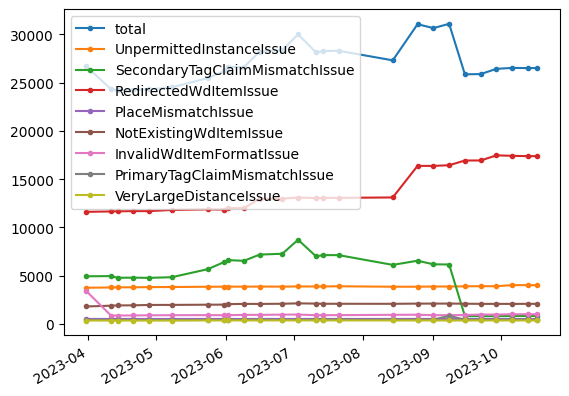

In [21]:
df.plot(marker='.')